In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
df_doc_train = pd.read_excel("Final_Train.xlsx")
df_doc_test = pd.read_excel("Final_Test.xlsx")

In [21]:
df_doc_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [22]:
df_doc_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [23]:
print(df_doc_train.info())
print(df_doc_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profil

In [24]:
df_doc_train['Place']=df_doc_train['Place'].fillna(df_doc_train['Place'].mode()[0])

In [25]:
df_doc_test['Place']=df_doc_test['Place'].fillna(df_doc_test['Place'].mode()[0])

In [26]:
df_doc_train['Rating']=df_doc_train['Rating'].fillna(method='ffill')
df_doc_test['Rating']=df_doc_test['Rating'].fillna(method='ffill')

In [27]:
print(df_doc_train.info())
print(df_doc_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              5961 non-null   object
 3   Place               5961 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              1985 non-null   object
 3   Place               1987 non-null   object
 4   Profil

In [28]:
df_doc_test['Rating']=df_doc_test['Rating'].fillna(df_doc_test['Place'].mode()[0])

In [31]:
df_doc_train=df_doc_train.drop(['Miscellaneous_Info'], axis=1)

In [32]:
df_doc_test=df_doc_test.drop(['Miscellaneous_Info'], axis=1)

In [41]:
#Converting string into integer
le = LabelEncoder()
cols1 = df_doc_train.iloc[:,:5].columns.values
for col in cols1:
    df_doc_train[col] = le.fit_transform(df_doc_train[col])
    
cols2 = df_doc_test.iloc[:,:5].columns.values
for col in cols2:
    df_doc_test[col] = le.fit_transform(df_doc_test[col])

In [42]:
df_doc_train.describe()

,Qualification,Experience,Rating,Place,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,32.488509,414.368059,2.441872,307.944640
std,413.842446,20.937163,20.402228,258.547684,1.658014,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,0.000000,197.000000,1.000000,150.000000
50%,596.000000,15.000000,44.000000,407.000000,2.000000,300.000000
75%,943.000000,36.000000,48.000000,628.000000,4.000000,500.000000
max,1419.000000,63.000000,50.000000,876.000000,5.000000,950.000000


In [43]:
df_doc_train_corr=df_doc_train.corr()
df_doc_train_corr
#No strong relationship between target and feature attribute

,Qualification,Experience,Rating,Place,Profile,Fees
Qualification,1.000000,0.003325,0.032080,0.006640,0.393123,0.263214
Experience,0.003325,1.000000,-0.079574,0.001328,-0.032711,-0.048529
Rating,0.032080,-0.079574,1.000000,-0.008214,0.007218,0.013826
Place,0.006640,0.001328,-0.008214,1.000000,0.019529,-0.052505
Profile,0.393123,-0.032711,0.007218,0.019529,1.000000,0.145226
Fees,0.263214,-0.048529,0.013826,-0.052505,0.145226,1.000000


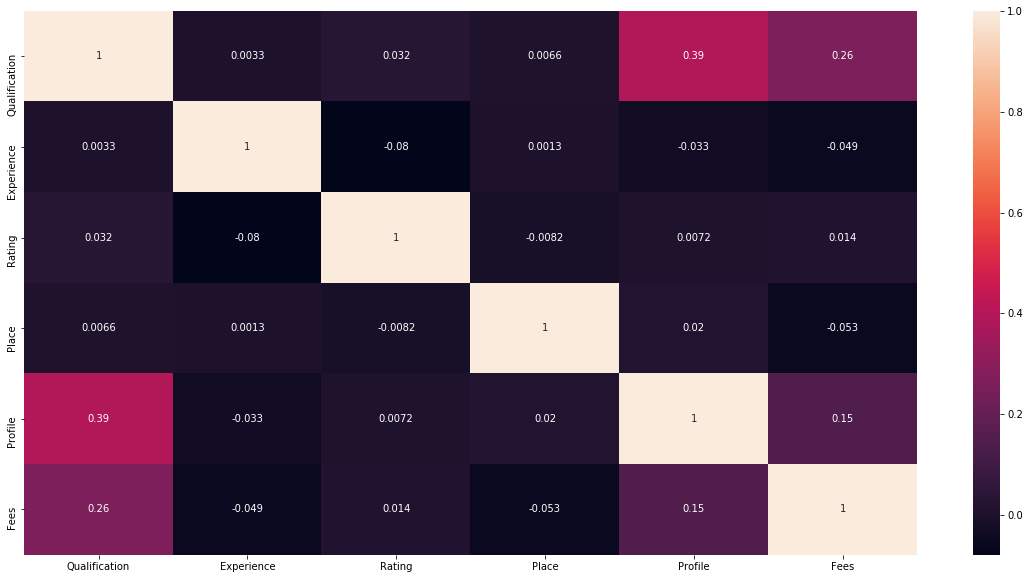

In [44]:
#Correlation between attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df_doc_train_corr, annot=True)
plt.show()

In [45]:
z_score=abs(zscore(df_doc_train))
print(df_doc_train.shape)
df_doc_train1_final=df_doc_train.loc[(z_score<3).all(axis=1)]                  
print(df_doc_train1_final.shape)
#to quantify the outliers

(5961, 6)
(5941, 6)


In [46]:
df_doc_train=df_doc_train[(z_score<3).all(axis=1)]
#To remove the outliers

In [47]:
z_score=abs(zscore(df_doc_test))
print(df_doc_test.shape)
df_doc_test1_final=df_doc_test.loc[(z_score<3).all(axis=1)]                  
print(df_doc_test1_final.shape)
#to quantify the outliers

(1987, 5)
(1987, 5)


In [48]:
#Splitting of data
x_train = df_doc_train.iloc[:,df_doc_train.columns != 'Fees'].values

x_test = df_doc_test.iloc[:,:].values

y_train = df_doc_train['Fees']

In [56]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.fit_transform(x_test)

y_train= y_train.values.reshape(-1,1)
y_train = sc.fit_transform(y_train)
y_train = y_train.ravel()
#scaling down using standardscalar

In [63]:
#Implementing DecisionTreeRegressor model
dtr = DecisionTreeRegressor()

dtr.fit(x_train,y_train)

y_pred = sc.inverse_transform(dtr.predict(x_test))


pd.DataFrame(y_pred, columns = ['Fees']).to_excel("Final_Pred.xlsx", index = False)

In [64]:
print(pd.DataFrame(y_pred).head())

       0
0  100.0
1  600.0
2  200.0
3  500.0
4  200.0


In [65]:
#Saving the model
import joblib
filename = 'Project18_model.pkl'
joblib.dump(dtr, filename)

['Project18_model.pkl']